In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#!pip install folium
import folium

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [538]:
df = pd.read_excel("C:/Users/nikau/Downloads/Airbnb Data (Mini Project 1).xlsx")
df

C:\Users\nikau\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,...,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,...,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,...,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,...,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,...,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,...,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,30574000,Kathleen,2015,4/4,5887073,Oostelijk Havengebied - Indische Buurt,Amsterdam,Noord-Holland,1019 SG,Netherlands,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7829,30575462,James,2015,4/4,5887362,Centrum-West,Amsterdam,Noord-Holland,1012 KC,Netherlands,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7830,30592860,Ruud,2015,4/4,5896701,Centrum-Oost,Amsterdam,Noord-Holland,1011,Netherlands,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7831,30593666,Trevelbadi,2015,4/4,5891027,Noord-West,Amsterdam,Noord-Holland,1035,Netherlands,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
# creating a subset from the original dataframe

df = df[['host_id', 'host_name',
       'id', 'neighbourhood_cleansed', 'city',
       'latitude', 'longitude', 'property_type', 'accommodates', 'price', 'guests_included',
 'minimum_nights', 'number_of_reviews', 'review_scores_rating']]

# should you invest in an airbnb in Amsterdam?

In [360]:
df.isna().sum()

host_id                      0
host_name                    0
id                           0
neighbourhood_cleansed       0
city                         0
latitude                     0
longitude                    0
property_type                0
accommodates                 0
price                        0
guests_included              0
minimum_nights               0
number_of_reviews            0
review_scores_rating      1698
dtype: int64

In [332]:
df.shape

(7833, 14)

In [334]:
df.describe()

,host_id,id,latitude,longitude,accommodates,price,guests_included,minimum_nights,number_of_reviews,review_scores_rating
count,7.833000e+03,7.833000e+03,7833.000000,7833.000000,7833.000000,7833.000000,7833.000000,7833.000000,7833.000000,6135.000000
mean,9.879849e+06,2.926936e+06,52.366533,4.888232,3.114643,129.010979,1.641900,2.509000,13.832887,93.342298
std,7.932933e+06,1.739974e+06,0.014116,0.030059,1.757483,128.032413,1.145144,1.898255,25.476797,7.535279
min,1.662000e+03,2.818000e+03,52.291569,4.763264,1.000000,15.000000,0.000000,1.000000,0.000000,20.000000
25%,3.430410e+06,1.309364e+06,52.356731,4.869670,2.000000,85.000000,1.000000,1.000000,1.000000,90.000000
50%,7.392601e+06,2.964891e+06,52.366538,4.886406,2.000000,109.000000,1.000000,2.000000,5.000000,95.000000
75%,1.505417e+07,4.473450e+06,52.375805,4.903265,4.000000,150.000000,2.000000,3.000000,15.000000,99.000000
max,3.059504e+07,5.897527e+06,52.425381,5.019667,16.000000,9000.000000,16.000000,27.000000,297.000000,100.000000


In [542]:
# Created a new 'revenue' column
# by multiplying the 'price' by the 'minimum nights stayed'

df['revenue'] = df['price'] * df['minimum_nights']
df.head(10)

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,...,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,revenue
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,...,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0,520
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,...,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0,177
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,...,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,285
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,...,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,200
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,...,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0,500
5,5271,Tyler,2008,12/17,5500954,Centrum-West,Amsterdam,NH,1016 AM,Netherlands,...,0.90,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280
6,5271,Tyler,2008,12/17,5181918,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,...,0.89,4,95.0,9.0,9.0,9.0,10.0,10.0,9.0,115
7,5988,Ramona,2009,1/4,2774924,Zuid,Amsterdam,North Holland,1071 VV,Netherlands,...,1.00,33,95.0,9.0,10.0,10.0,10.0,10.0,9.0,240
8,9616,Laura,2009,3/9,23651,De Pijp - Rivierenbuurt,Amsterdam,North Holland,1078,Netherlands,...,1.00,36,96.0,9.0,10.0,10.0,10.0,9.0,9.0,480
9,14589,Rutger,2009,4/23,738245,Centrum-West,Amsterdam,North Holland,1015,Netherlands,...,NaN,8,93.0,10.0,9.0,9.0,9.0,10.0,9.0,270


# which host owns the most amount of property types?

In [534]:
props = pd.DataFrame(df['host_name'].value_counts())
props.head(20).T

,Douwe&Niki,Jorrit&Dirk,Myra,Peter,Michiel,Anne,Jeroen,Eva,David,Nanne & Nick,Bas,Paul,Anna,Esther,Martijn,Thomas,Mark,Kim,Monique,Laura
host_name,91,72,59,50,49,43,36,35,35,34,34,33,32,31,30,29,28,28,27,26


<AxesSubplot:>

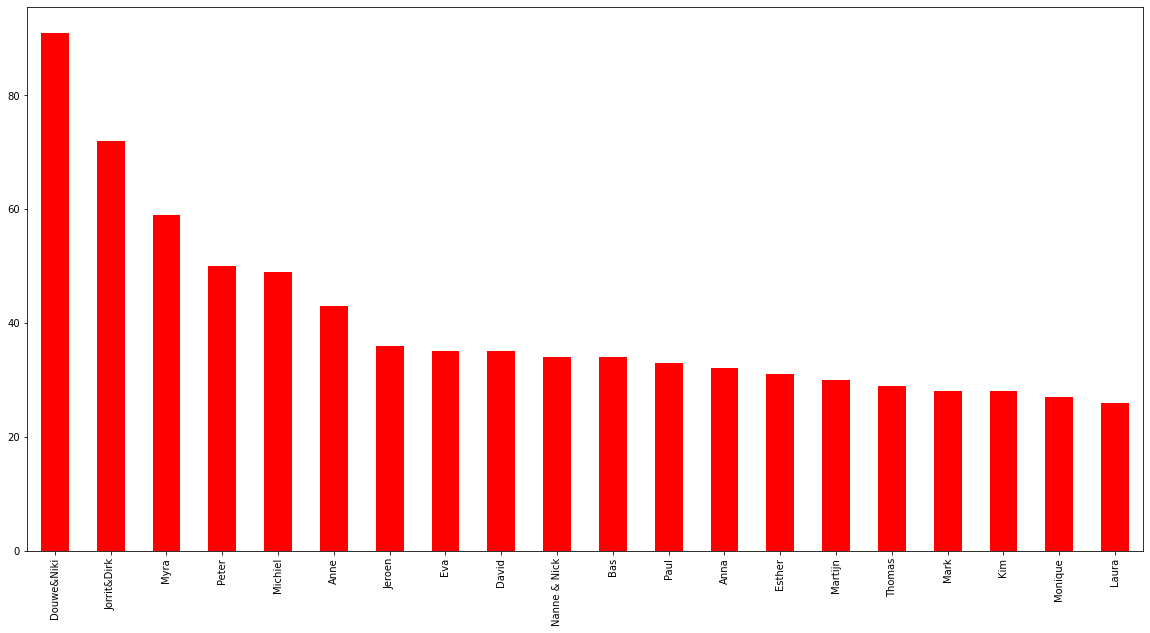

In [537]:

prop_count = df['host_name'].value_counts()
prop_count.head(20).plot(kind='bar', color='red', figsize=[20,10])

From the graph above you can see that the host with the most amount of property types is Douwe&Niki with a total amount of 91 

# table of the the hosts and their revenue

Since we have the total amount of property types for each host, we can now find the revenue that each host receives.

In [298]:
rev = df[['host_name', 'revenue']]
rev.sort_index(ascending=False)

,host_name,revenue
7832,Christiaan,230
7831,Trevelbadi,70
7830,Ruud,660
7829,James,320
7828,Kathleen,300
...,...,...
4,Tyler,500
3,Stefan,200
2,Britta,285
1,Daniel,177


# which host has the most revenue?

In [540]:
# Douwe&Niki have the most amount of revenue

reven = pd.pivot_table(rev, values=None, index='host_name', aggfunc='sum')
reven.sort_index(ascending=False)
revenue_sum = reven.sort_values(by='revenue',ascending=False)
revenue_sum.head(20).T

host_name,Douwe&Niki,Alex,Peter,Myra,Jorrit&Dirk,David,Fred & Wietske,Diederik,Michiel,Eliseo,Paul,Jeroen,Remco,Emmett,Alexander,Niels,Bart,Simon & Jolanda,Anne,Nanne & Nick
revenue,34137,30078,24211,23910,22983,20870,16945,16805,14656,12754,11494,11431,11295,11178,10999,10162,10121,10108,10003,9933


<AxesSubplot:xlabel='host_name'>

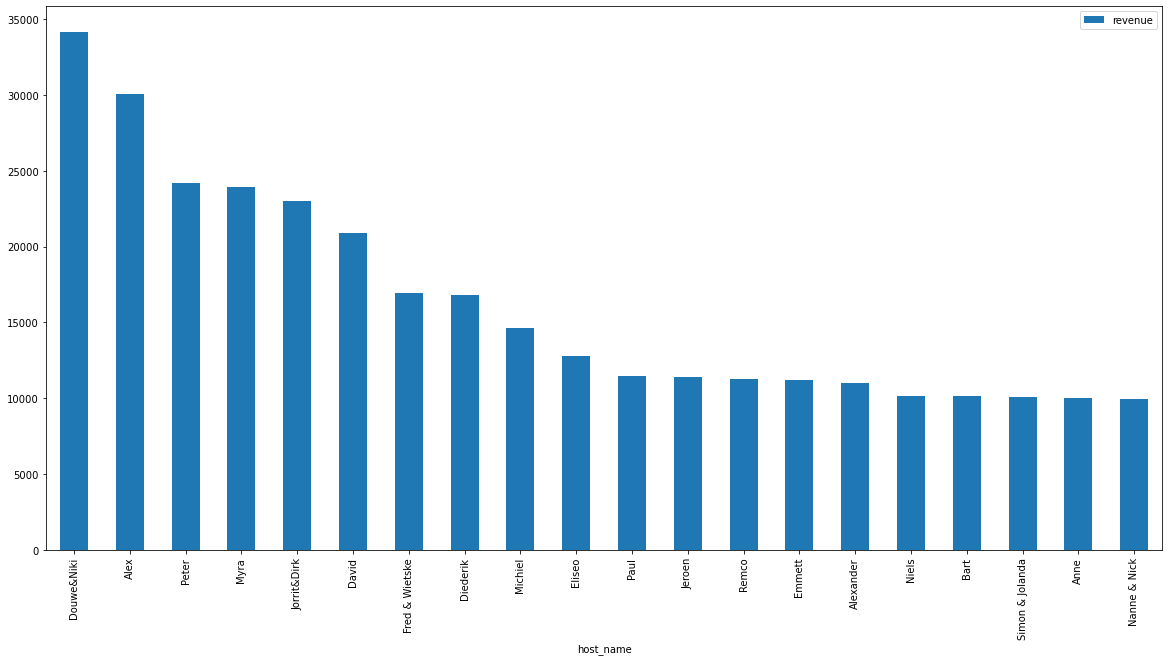

In [541]:
revenue_sum.head(20).plot(kind='bar', figsize=[20,10])

As you can see from the graph above, Douwe&Niki have the moust revenue amongst the hosts, this makes sense as they also own the most properties.

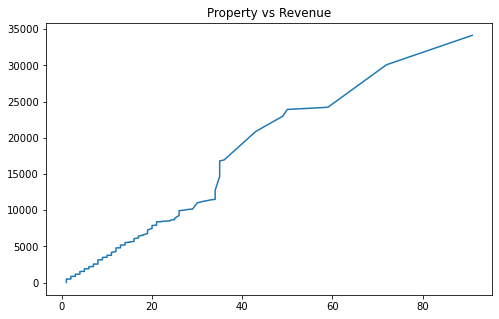

In [479]:
plt.figure(figsize=(8,5))
plt.plot(prop_count, revenue_sum.revenue)
plt.title('Property vs Revenue')
plt.show()

#  Which property types receive the most positive reviews?

In [533]:
prop_pivot = pd.pivot_table(df, values='number_of_reviews', index=('review_scores_rating'), columns=df['property_type'], aggfunc=sum)
prop_pivot.drop(['Cabin','Camper/RV','Chalet','Dorm','Earth House', 'Hut', 'Loft', 'Other', 'Yurt'], axis=1).tail(10).fillna(0)

property_type,Apartment,Bed & Breakfast,Boat,House,Villa
review_scores_rating,,,,,
91.0,4926.0,1048.0,396.0,385.0,0.0
92.0,4247.0,452.0,290.0,349.0,12.0
93.0,7756.0,485.0,311.0,928.0,0.0
94.0,7387.0,1733.0,407.0,599.0,22.0
95.0,8613.0,1090.0,579.0,702.0,32.0
96.0,7507.0,624.0,601.0,697.0,0.0
97.0,9025.0,1178.0,790.0,1107.0,0.0
98.0,6866.0,339.0,612.0,296.0,0.0
99.0,4070.0,70.0,545.0,339.0,0.0


'Apartments' receive the most positive review as they have the largest amount of review scores between 90-100

# which neighbourhood has the most listings?

In [520]:
prop_pivot = pd.pivot_table(df, values='number_of_reviews', index='neighbourhood_cleansed', columns=df['property_type'], aggfunc=sum)
new_prop = prop_pivot
new_prop.drop(['Cabin','Camper/RV','Chalet','Dorm','Earth House', 'Hut', 'Loft', 'Other', 'Treehouse', 'Yurt'], axis=1).fillna(0)

property_type,Apartment,Bed & Breakfast,Boat,House,Villa
neighbourhood_cleansed,,,,,
Bijlmer-Centrum,117.0,90.0,0.0,0.0,0.0
Bijlmer-Oost,120.0,2.0,0.0,19.0,0.0
Bos en Lommer,3546.0,370.0,1.0,72.0,0.0
Buitenveldert - Zuidas,553.0,2.0,0.0,33.0,0.0
Centrum-Oost,11823.0,584.0,1551.0,1188.0,32.0
Centrum-West,19230.0,4176.0,1121.0,1853.0,15.0
De Aker - Nieuw Sloten,174.0,44.0,0.0,193.0,0.0
De Baarsjes - Oud-West,15549.0,1491.0,615.0,541.0,0.0
De Pijp - Rivierenbuurt,10131.0,580.0,88.0,504.0,0.0


<AxesSubplot:xlabel='neighbourhood_cleansed'>

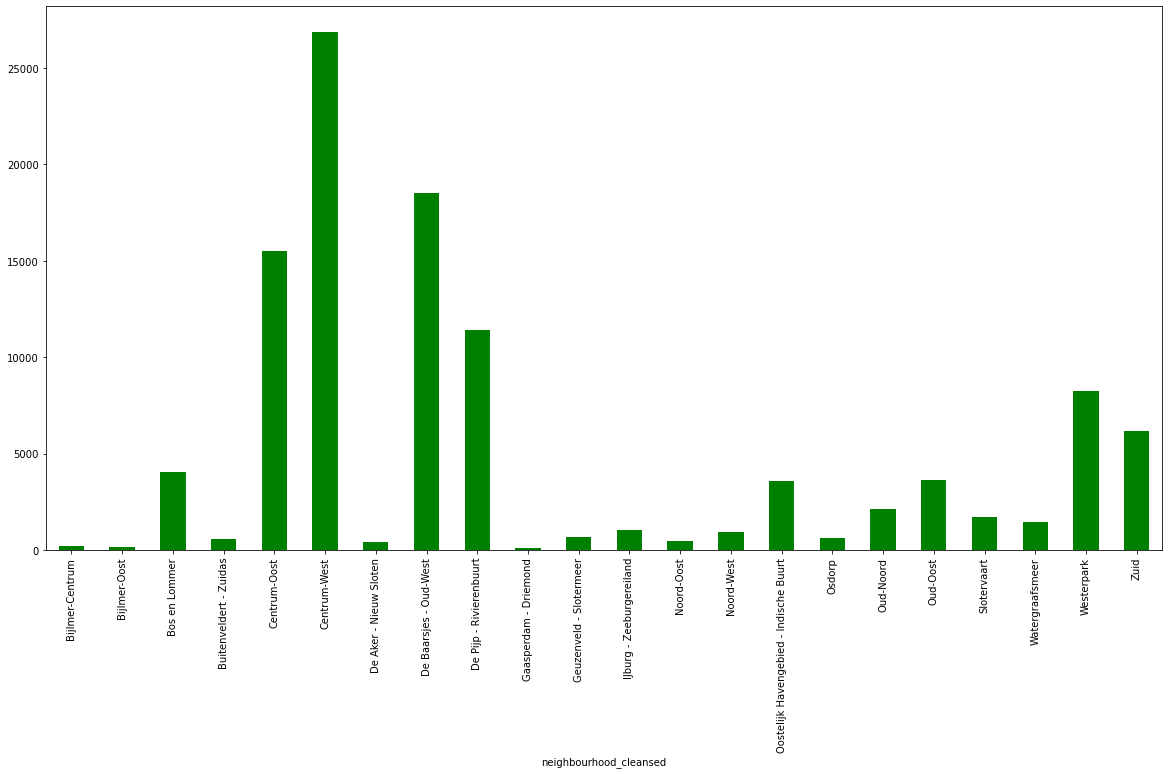

In [516]:
prop_pivot.T.sum().plot(kind='bar', figsize=[20,10], color='green')

In [222]:
# looking at the table above it is obvious that Centrum-West has the most property listings

In [543]:
def generateBaseMap(default_location=[52.36653256693751, 4.88823159120202], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [544]:
amster_location = [52.371533, 4.887057]
m = generateBaseMap(default_location=amster_location)
m

Heatmap of the city of Amsterdam showing the density of airbnb's

In [545]:
from folium.plugins import HeatMap

base_map = generateBaseMap(default_location=[52.373021, 4.885144])
df['count'] = 1

HeatMap(
    data = df[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), 
    radius=8,
    max_zoom=9).add_to(base_map)

display(base_map)

from the above table you can see that the neighbourhood that has the most listings is Centrum-West.

# which neighbourhood receives the most positive reviews?

In [521]:

positive_pivot = pd.pivot_table(df, values='number_of_reviews', index='review_scores_rating', columns=df['neighbourhood_cleansed'], aggfunc=sum)
positive_pivot.tail(10).fillna(0)

neighbourhood_cleansed,Bijlmer-Centrum,Bijlmer-Oost,Bos en Lommer,Buitenveldert - Zuidas,Centrum-Oost,Centrum-West,De Aker - Nieuw Sloten,De Baarsjes - Oud-West,De Pijp - Rivierenbuurt,Gaasperdam - Driemond,...,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
review_scores_rating,,,,,,,,,,,,,,,,,,,,,
91.0,15.0,20.0,181.0,145.0,1019.0,1700.0,20.0,729.0,830.0,0.0,...,21.0,202.0,201.0,144.0,287.0,261.0,105.0,200.0,473.0,168.0
92.0,39.0,0.0,114.0,28.0,1016.0,1306.0,42.0,943.0,644.0,0.0,...,12.0,26.0,105.0,130.0,61.0,96.0,35.0,29.0,527.0,328.0
93.0,17.0,9.0,356.0,44.0,1250.0,2057.0,3.0,1796.0,1336.0,9.0,...,8.0,76.0,273.0,31.0,88.0,351.0,153.0,177.0,780.0,742.0
94.0,21.0,54.0,241.0,23.0,1326.0,2839.0,15.0,1612.0,1520.0,0.0,...,67.0,70.0,249.0,17.0,486.0,191.0,195.0,151.0,854.0,206.0
95.0,0.0,0.0,556.0,0.0,1325.0,3235.0,21.0,2264.0,949.0,32.0,...,14.0,44.0,167.0,47.0,115.0,521.0,147.0,126.0,984.0,651.0
96.0,10.0,0.0,248.0,62.0,1663.0,2192.0,24.0,2000.0,872.0,0.0,...,87.0,70.0,231.0,22.0,133.0,348.0,139.0,83.0,734.0,558.0
97.0,0.0,0.0,335.0,21.0,2169.0,3158.0,98.0,2091.0,726.0,7.0,...,1.0,66.0,726.0,13.0,120.0,730.0,128.0,106.0,763.0,850.0
98.0,0.0,0.0,180.0,22.0,1015.0,2733.0,10.0,1465.0,870.0,0.0,...,21.0,19.0,363.0,21.0,103.0,198.0,39.0,120.0,434.0,438.0
99.0,0.0,0.0,91.0,0.0,1067.0,1431.0,0.0,561.0,592.0,0.0,...,0.0,0.0,183.0,0.0,2.0,151.0,189.0,0.0,273.0,418.0


In [308]:
positive_pivot.sum()

neighbourhood_cleansed
Bijlmer-Centrum                             206.0
Bijlmer-Oost                                141.0
Bos en Lommer                              4041.0
Buitenveldert - Zuidas                      590.0
Centrum-Oost                              15514.0
Centrum-West                              26837.0
De Aker - Nieuw Sloten                      412.0
De Baarsjes - Oud-West                    18501.0
De Pijp - Rivierenbuurt                   11386.0
Gaasperdam - Driemond                        78.0
Geuzenveld - Slotermeer                     660.0
IJburg - Zeeburgereiland                   1041.0
Noord-Oost                                  486.0
Noord-West                                  931.0
Oostelijk Havengebied - Indische Buurt     3550.0
Osdorp                                      598.0
Oud-Noord                                  2104.0
Oud-Oost                                   3605.0
Slotervaart                                1703.0
Watergraafsmeer            

<AxesSubplot:xlabel='neighbourhood_cleansed'>

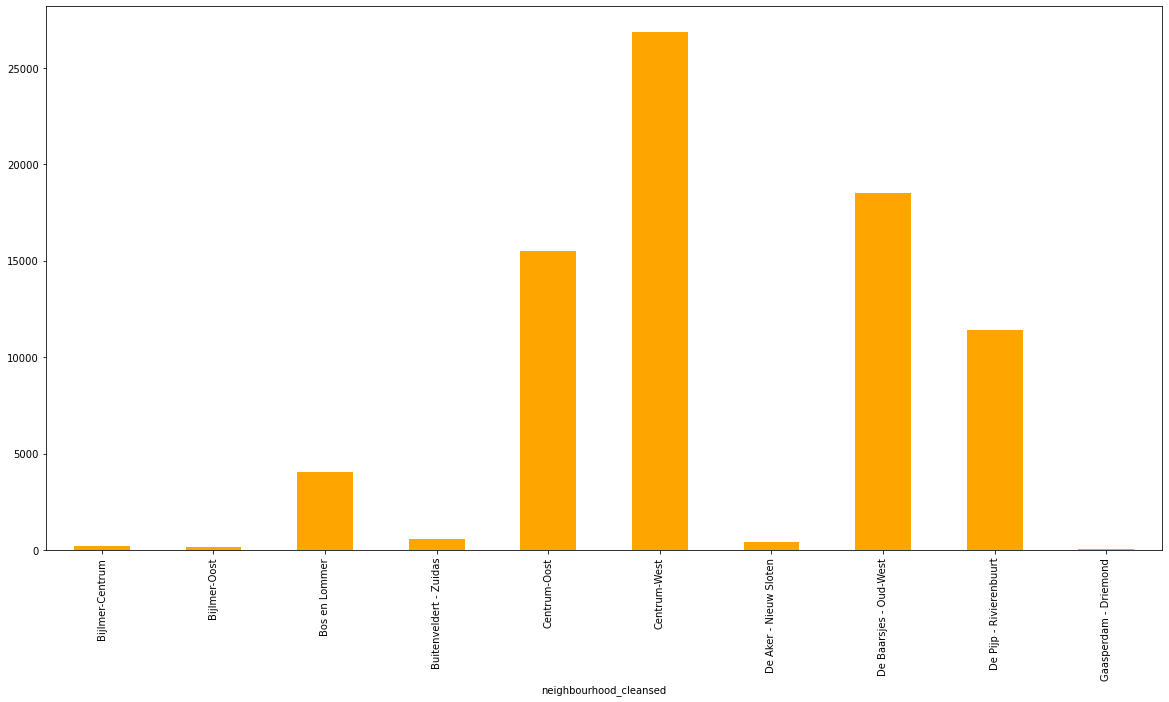

In [518]:
positive_pivot.sum().head(10).plot(kind='bar', figsize=[20,10], color='orange')

In [255]:
# Centrum west have the most amount of positive reviews, they are the most popular neighbourhood in the city

# which neighbourhood is the best to live in?

In [519]:
pop = df[['neighbourhood_cleansed','revenue','minimum_nights']]
pop['avg_per_night'] = pop['revenue']/pop['minimum_nights']
pop.sort_values(by='revenue')
new_all = pd.pivot_table(pop, values=None, index='neighbourhood_cleansed')
new_all.sort_index(ascending=False)
location_sum = new_all.sort_values(by='avg_per_night',ascending=False)
location_sum

C:\Users\nikau\AppData\Local\Temp/ipykernel_4948/2698100246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['avg_per_night'] = pop['revenue']/pop['minimum_nights']


,avg_per_night,minimum_nights,revenue
neighbourhood_cleansed,,,
Centrum-West,160.987377,2.635344,422.234923
Centrum-Oost,148.176087,2.604348,404.752174
Westerpark,140.754717,2.313498,329.490566
Zuid,133.487047,2.506045,337.894646
IJburg - Zeeburgereiland,132.712871,2.564356,372.881188
Oud-Noord,123.233010,2.441748,282.101942
De Pijp - Rivierenbuurt,122.356512,2.443709,301.915011
Watergraafsmeer,117.134078,2.631285,320.446927
De Aker - Nieuw Sloten,115.023810,1.785714,201.404762


In [ ]:
# "Centrum West" takes the top spot, people spend roughly $160 a night for a BnB here.
# My decision would be not to invest in a property in Amsterdam as the competition is very high
# Unless you can offer a price cheaper than what is listed, I would say no to investing